# VISUALIZATION

In [102]:
import sys
!{sys.executable} -m pip install wordcloud

     |████████████████████████████████| 368kB 408kB/s eta 0:00:01


In [34]:
from wordcloud import WordCloud
pos_worCloud = WordCloud().generate(posStr)

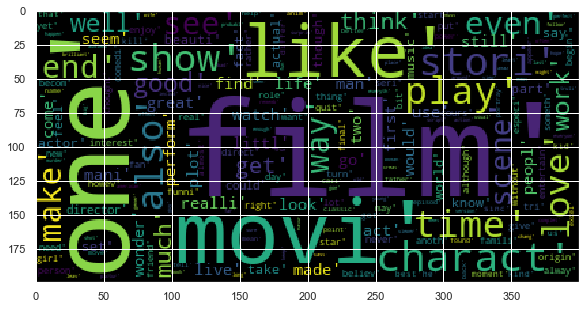

In [52]:
plt.figure()
plt.imshow(pos_worCloud)
plt.show()

In [36]:
negList = train_df[train_df['label'] == 0]['refined review'].tolist()
neg = "".join(str(negList))
neg[0:20]

"[['run', 'group', 's"

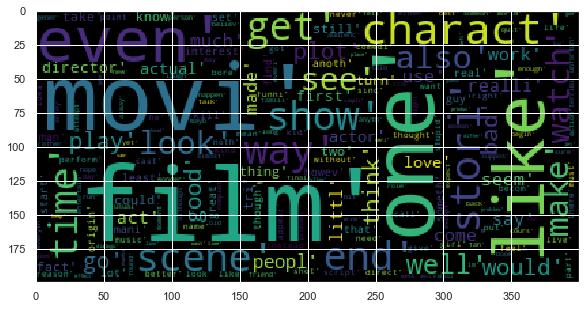

In [51]:
neg_worCloud = WordCloud().generate(neg)
plt.figure()
plt.imshow(neg_worCloud)
plt.show()

In [38]:
import seaborn as sns

[]

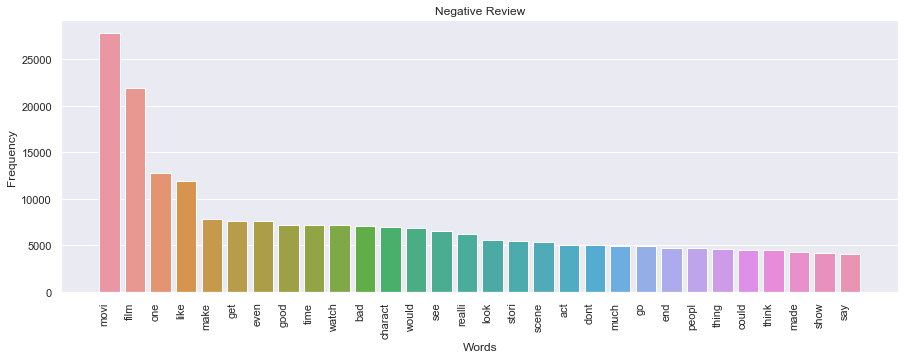

In [43]:
pl = sns.barplot(word_dist_neg_train['Word'][0:30],word_dist_neg_train['Frequency'][0:30])
sns.set(rc={'figure.figsize':(30,5)})
pl.set_xticklabels(pl.get_xticklabels(),rotation=90,horizontalalignment='right')
pl.set(xlabel = 'Words', title= 'Negative Review')
pl.plot()

[]

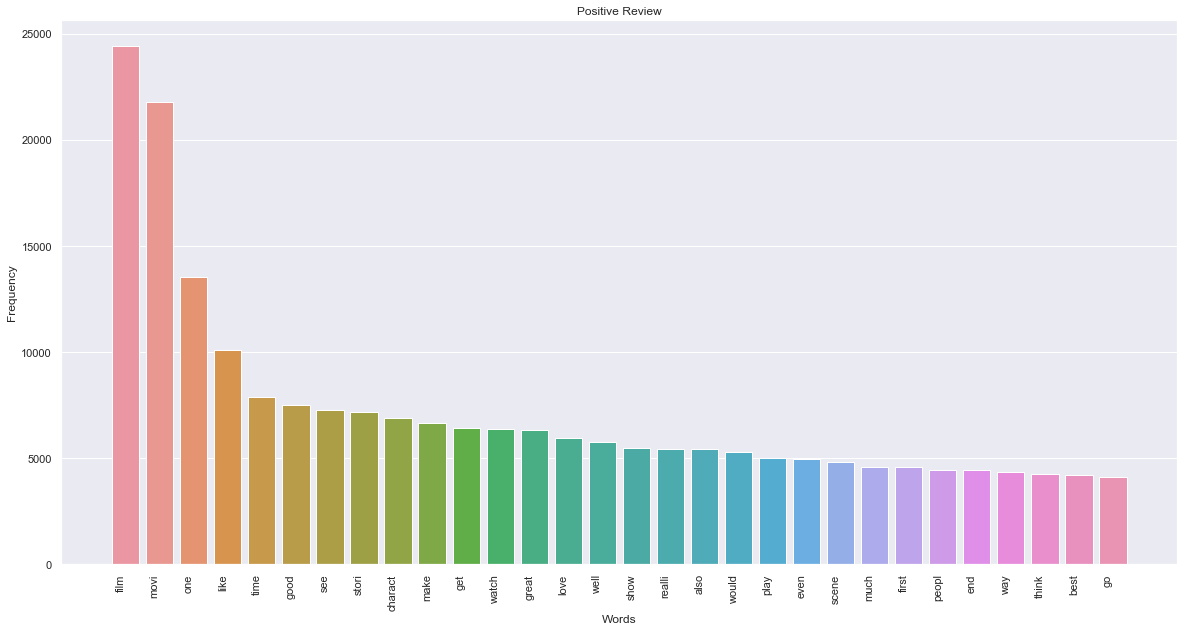

In [59]:
pl = sns.barplot(word_dist_pos_train['Word'][0:30],word_dist_pos_train['Frequency'][0:30])
sns.set(rc={'figure.figsize':(20,15)})
pl.set_xticklabels(pl.get_xticklabels(),rotation=90,horizontalalignment='right')
pl.set(xlabel = 'Words', title= 'Positive Review')
pl.plot()

# MODEL BUILDING

LOGISTIC REGRESSION

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=cleanText)
x_train_counts = count_vect.fit(train_df['review'].values).transform(train_df['review'].values) 
x_train_counts

<25000x112775 sparse matrix of type '<class 'numpy.int64'>'
	with 2423394 stored elements in Compressed Sparse Row format>

In [70]:
x_test_counts = count_vect.transform(test_df['review'].values)
x_test_counts

<25000x112775 sparse matrix of type '<class 'numpy.int64'>'
	with 2288086 stored elements in Compressed Sparse Row format>

In [71]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(max_iter=1000)
logReg.fit(x_train_counts,train_df['label'])

/home/varun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
prediction_lr = logReg.predict(x_test_counts)
prediction_lr

array([1, 1, 1, ..., 1, 0, 0])

In [83]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(x_test_counts,test_df['label'])))

Accuracy of logistic regression classifier on test set: 0.86


In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(test_df['label'], prediction_lr)

0.85724

In [100]:
from sklearn.metrics import confusion_matrix
matrix_lr = confusion_matrix(test_df['label'],prediction_lr)
matrix_lr

array([[10816,  1684],
       [ 1885, 10615]])

In [97]:
from sklearn.metrics import classification_report
report_lr = classification_report(test_df['label'],prediction_lr,labels=[0,1])
print(report_lr)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     12500
           1       0.86      0.85      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



K-MEANS

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfIdf = TfidfVectorizer(analyzer=cleanText)
x_tfIdf = tfIdf.fit_transform(unsup_df['review'])

In [76]:
kmeans = KMeans(n_clusters=2,n_init=30,max_iter=1000)
kmeans.fit(x_tfIdf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [85]:
prediction_km = kmeans.predict(x_tfIdf)
prediction_km

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [88]:
unsup_df_2 = unsup_df.copy()
unsup_df_2 = unsup_df_2.drop(['label'],axis=1)
unsup_df_2.head()

,review,refined review
0,I saw this on television recently. I remember ...,"[saw, televis, recent, rememb, saw, first, ear..."
1,"This English re-titled ""A Reason to Live, A Re...","[english, retitl, reason, live, reason, die, t..."
2,There is NO Esperanto in this movie<br /><br /...,"[esperanto, moviei, watch, movi, specif, imdb,..."
3,"The sweetest movie I've seen all year, full of...","[sweetest, movi, ive, seen, year, full, funni,..."
4,"Poorly written, poorly plotted, poorly acted, ...","[poorli, written, poorli, plot, poorli, act, p..."


In [89]:
unsup_df_2['label'] = prediction_km
unsup_df_2.head()

,review,refined review,label
0,I saw this on television recently. I remember ...,"[saw, televis, recent, rememb, saw, first, ear...",0
1,"This English re-titled ""A Reason to Live, A Re...","[english, retitl, reason, live, reason, die, t...",0
2,There is NO Esperanto in this movie<br /><br /...,"[esperanto, moviei, watch, movi, specif, imdb,...",0
3,"The sweetest movie I've seen all year, full of...","[sweetest, movi, ive, seen, year, full, funni,...",0
4,"Poorly written, poorly plotted, poorly acted, ...","[poorli, written, poorli, plot, poorli, act, p...",0


RANDOM FOREST CLASSIFIER

In [80]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [81]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(x_train_counts, train_df['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

/home/varun/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,410.793958,4.339088,2.531949,0.214307,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.8630,0.8654,0.8636,0.8578,0.8518,0.86032,0.004954,1
11,497.930244,60.107347,2.273278,0.456510,None,300,"{'max_depth': None, 'n_estimators': 300}",0.8638,0.8602,0.8606,0.8566,0.8544,0.85912,0.003283,2
5,277.068742,2.777242,1.856615,0.123153,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.8666,0.8578,0.8604,0.8550,0.8554,0.85904,0.004245,3
2,119.297702,2.271053,1.623899,0.120882,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.8592,0.8558,0.8548,0.8516,0.8442,0.85312,0.005076,4
4,141.858311,3.558409,0.974041,0.114614,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.8544,0.8552,0.8558,0.8542,0.8432,0.85256,0.004715,5


In [92]:
rf = RandomForestClassifier(n_estimators=300,max_depth=90)
rf.fit(x_train_counts,train_df['label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=90, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
prediction_rf = rf.predict(x_test_counts)

In [94]:
accuracy_score(test_df['label'], prediction_rf)

0.85784

In [102]:
matrix_rf = confusion_matrix(test_df['label'],prediction_rf)
print(matrix_rf)

[[10605  1895]
 [ 1659 10841]]


In [103]:
report_rf = classification_report(test_df['label'],prediction_rf,labels=[0,1])
print(report_rf)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     12500
           1       0.85      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



AGGLOMERATIVE HIERARCHICAL CLUSTERING

In [137]:
x_tfIdf2 = tfIdf.fit_transform(unsup_df['review'][0:5000])
x_tfIdf2

<5000x41948 sparse matrix of type '<class 'numpy.float64'>'
	with 486134 stored elements in Compressed Sparse Row format>

In [138]:
mergings = shc.linkage(pd.DataFrame(x_tfIdf2.toarray()), method='ward')

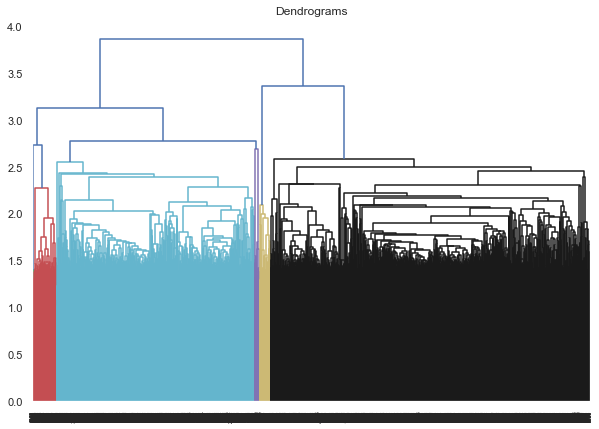

In [139]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(mergings)

In [144]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') 
agg_cluster.fit(x_tfIdf2.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [146]:
prediction_ac = agg_cluster.fit_predict(x_tfIdf2.toarray())
prediction_ac

array([0, 1, 1, ..., 0, 0, 0])

In [143]:
unsup_df_3 = unsup_df[0:5000].copy()
unsup_df_3 = unsup_df_3.drop(['label'],axis=1)
unsup_df_3.head()

,review,refined review
0,I saw this on television recently. I remember ...,"[saw, televis, recent, rememb, saw, first, ear..."
1,"This English re-titled ""A Reason to Live, A Re...","[english, retitl, reason, live, reason, die, t..."
2,There is NO Esperanto in this movie<br /><br /...,"[esperanto, moviei, watch, movi, specif, imdb,..."
3,"The sweetest movie I've seen all year, full of...","[sweetest, movi, ive, seen, year, full, funni,..."
4,"Poorly written, poorly plotted, poorly acted, ...","[poorli, written, poorli, plot, poorli, act, p..."


In [150]:
unsup_df_3['label'] = prediction_ac
unsup_df_3.head()

,review,refined review,label
0,I saw this on television recently. I remember ...,"[saw, televis, recent, rememb, saw, first, ear...",0
1,"This English re-titled ""A Reason to Live, A Re...","[english, retitl, reason, live, reason, die, t...",1
2,There is NO Esperanto in this movie<br /><br /...,"[esperanto, moviei, watch, movi, specif, imdb,...",1
3,"The sweetest movie I've seen all year, full of...","[sweetest, movi, ive, seen, year, full, funni,...",0
4,"Poorly written, poorly plotted, poorly acted, ...","[poorli, written, poorli, plot, poorli, act, p...",1
